In [ ]:
# Perform exploratory data analysis
# Decomposition of data
# Test the Stationarity

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
df=pd.read_csv("dataset/AirPassengers.csv")

In [25]:
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [26]:
df.columns=["Month","Passengers"]

In [27]:
df.head(10)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [28]:
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
import math
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

import warnings
warnings.filterwarnings('ignore')

In [29]:
df['Month']=df['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
df=df.set_index("Month")

In [30]:
df.head()

,Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [35]:
ts=df["Passengers"]

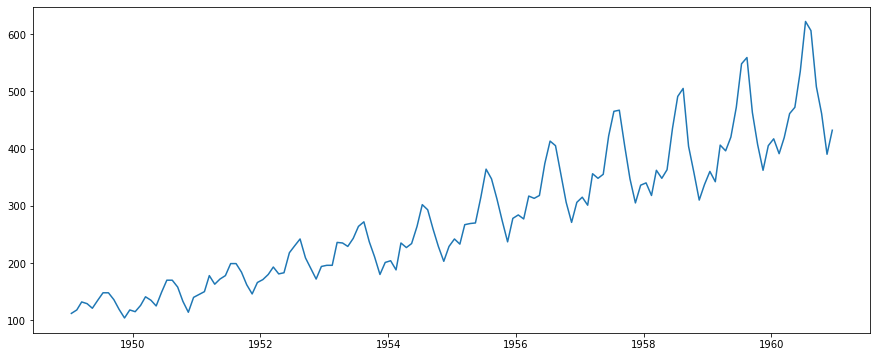

In [36]:
plt.plot(ts)

In [37]:
ts_log= np.log(ts)

In [41]:
def test_stationary(timeseries):
    rolmean= timeseries.rolling(window=52,center=False).mean()
    rolstd=timeseries.rolling(window=52,center=False).std()
    
    orig =plt.plot(timeseries,color='Blue',label="Original")
    mean=plt.plot(rolmean,color='red',label="Rolling Mean")
    std=plt.plot(rolstd,color='red',label="Rolling Std")
    plt.legend(loc='best')
    plt.title("Rollign mean & standard deviation")
    plt.show(block=False)
    print("Result of Dickey-Fuller Test:")
    dftest=adfuller(timeseries,autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value","# Lags Used", "Number of Observations Used "])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]=value
    print(dfoutput)

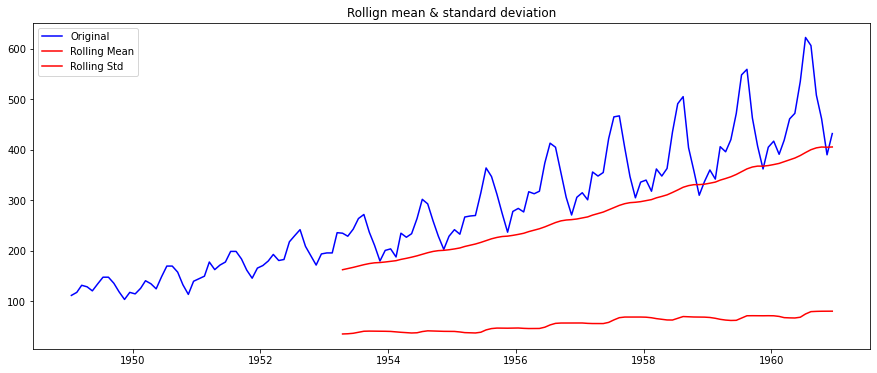

Result of Dickey-Fuller Test:
Test Statistic                    0.815369
p-value                           0.991880
# Lags Used                      13.000000
Number of Observations Used     130.000000
Critical Value (1%)              -3.481682
Critical Value (5%)              -2.884042
Critical Value (10%)             -2.578770
dtype: float64


In [42]:
test_stationary(df['Passengers'])

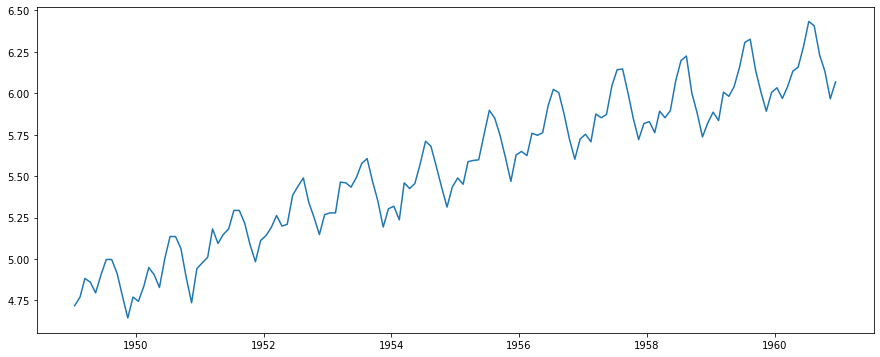

In [43]:
plt.plot(ts_log)

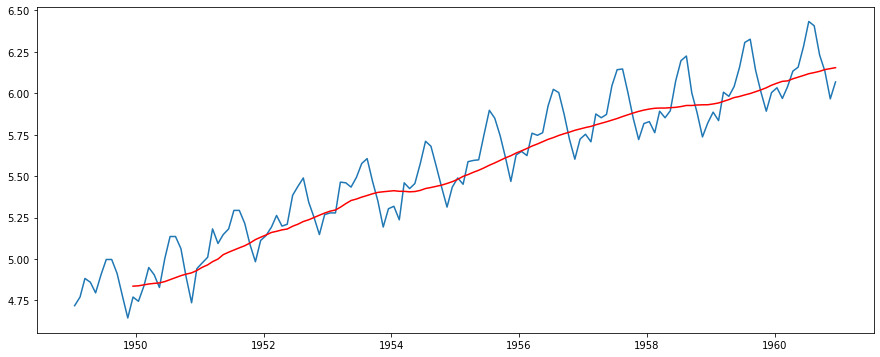

In [44]:
movingAverage= ts_log.rolling(window=12).mean()
movingSTD= ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage,color="red")

In [45]:
ts_log_mv_diff=ts_log - movingAverage
ts_log_mv_diff.head(12)
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: Passengers, dtype: float64

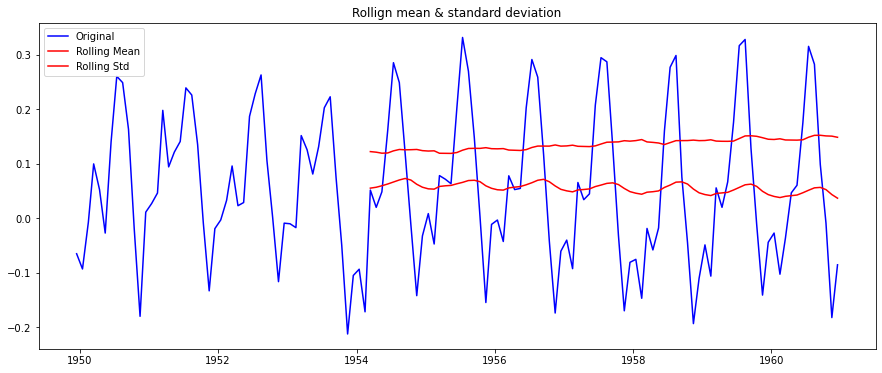

Result of Dickey-Fuller Test:
Test Statistic                   -3.162908
p-value                           0.022235
# Lags Used                      13.000000
Number of Observations Used     119.000000
Critical Value (1%)              -3.486535
Critical Value (5%)              -2.886151
Critical Value (10%)             -2.579896
dtype: float64


In [46]:
test_stationary(ts_log_mv_diff)